In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [167]:
ds=pd.read_csv('winequality-red.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [168]:
df=pd.DataFramedata=(ds)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [169]:
df.shape

(1599, 12)

In [170]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [172]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

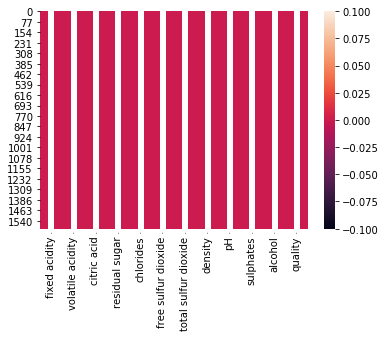

In [173]:
#Lets check whether the null values are present in the dataset or not using heatmap

sns.heatmap(df.isnull(), annot=True)
plt.show()

In [174]:
#lets check the null values without using visualization

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [175]:
df.alcohol.value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.500000     67
            ... 
11.950000      1
9.233333       1
11.066667      1
13.200000      1
9.566667       1
Name: alcohol, Length: 65, dtype: int64

In [176]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [177]:
#treating using lag
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [178]:
#Lets again check the skewness
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [179]:
2.	#treating using Square Root Transform
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.sqrt(df[col])

In [180]:
#Lets again check the skewness
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          1.748459
chlorides               3.332369
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.122806
alcohol                 0.642902
quality                 0.217802
dtype: float64

In [181]:
#Now lets check the Correlation factor

dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.261021,0.668625,0.173231,0.161921,-0.178267,-0.114024,0.674368,-0.704262,0.197182,-0.089111,0.115684
volatile acidity,-0.261021,1.000000,-0.564399,0.029021,0.096762,0.020740,0.084123,0.029969,0.233642,-0.295847,-0.213554,-0.393391
citric acid,0.668625,-0.564399,1.000000,0.172924,0.194282,-0.087838,-0.002553,0.364947,-0.541904,0.329956,0.108819,0.226373
residual sugar,0.173231,0.029021,0.172924,1.000000,0.089679,0.096451,0.153972,0.418173,-0.091509,0.022479,0.081234,0.023779
chlorides,0.161921,0.096762,0.194282,0.089679,1.000000,-0.009691,0.069852,0.290901,-0.281350,0.285301,-0.275547,-0.157749
free sulfur dioxide,-0.178267,0.020740,-0.087838,0.096451,-0.009691,1.000000,0.784256,-0.039532,0.095520,0.055027,-0.083459,-0.050344
total sulfur dioxide,-0.114024,0.084123,-0.002553,0.153972,0.069852,0.784256,1.000000,0.104534,-0.016021,0.053011,-0.238492,-0.171419
density,0.674368,0.029969,0.364947,0.418173,0.290901,-0.039532,0.104534,1.000000,-0.341699,0.163294,-0.490347,-0.174919
pH,-0.704262,0.233642,-0.541904,-0.091509,-0.281350,0.095520,-0.016021,-0.341699,1.000000,-0.161854,0.206247,-0.057731
sulphates,0.197182,-0.295847,0.329956,0.022479,0.285301,0.055027,0.053011,0.163294,-0.161854,1.000000,0.130105,0.300759


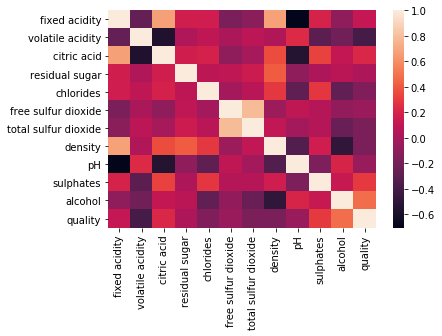

In [182]:
#Now lets check the Correlation factor with visualization

sns.heatmap(dfcor)

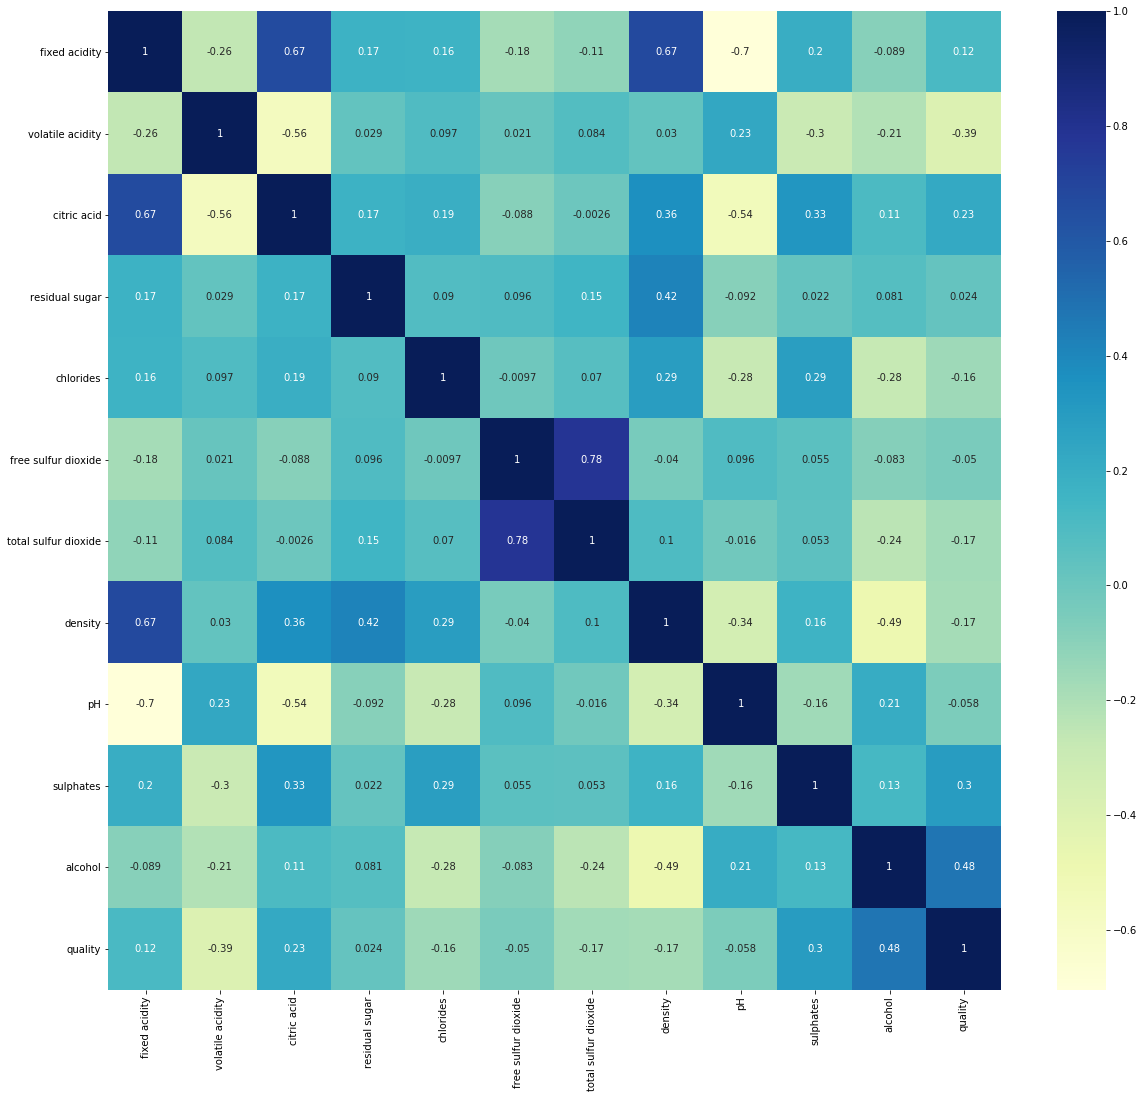

In [183]:
plt.figure(figsize=(20,18))
sns.heatmap(dfcor, cmap='YlGnBu', annot=True)

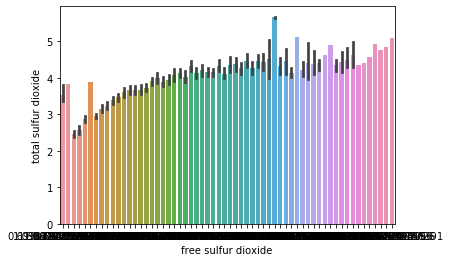

In [184]:
#Lets check what is the average compressive strngth grouped by age
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="free sulfur dioxide", y="total sulfur dioxide", data=df)
plt.show()

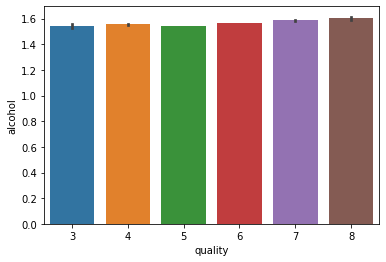

In [185]:
sns.barplot(x="quality", y="alcohol", data=df)
plt.show()

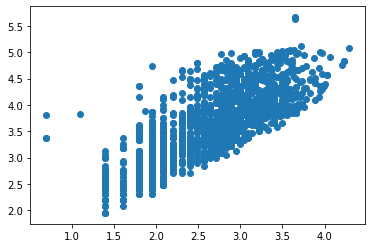

In [186]:
plt.scatter(x="free sulfur dioxide", y="total sulfur dioxide", data=df)
plt.show()


In [187]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.215842,0.417173,0.270976,1.097953,0.283484,2.639013,3.634750,0.996747,3.311113,0.705049,1.559047,5.636023
std,0.178100,0.114926,0.194801,0.112422,0.051732,0.623790,0.682575,0.001887,0.154386,0.063092,0.028830,0.807569
min,1.722767,0.113329,0.000000,0.801158,0.109218,0.693147,1.945910,0.990070,2.740000,0.534021,1.496900,3.000000
25%,2.091864,0.329304,0.090000,1.031848,0.260113,2.079442,3.135494,0.995600,3.210000,0.662008,1.533419,5.000000
50%,2.186051,0.418710,0.260000,1.078495,0.275744,2.708050,3.663562,0.996750,3.310000,0.694569,1.554321,6.000000
75%,2.322388,0.494696,0.420000,1.131783,0.293560,3.091042,4.143135,0.997835,3.400000,0.740352,1.578989,6.000000
max,2.827314,0.947789,1.000000,1.674324,0.690547,4.290459,5.669881,1.003690,4.010000,1.048147,1.663226,8.000000


AxesSubplot(0.125,0.125;0.775x0.755)


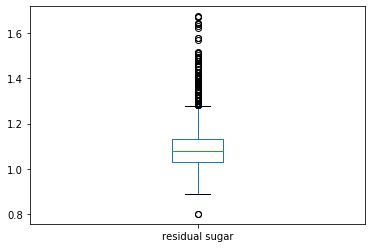

In [188]:
print(df['residual sugar'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


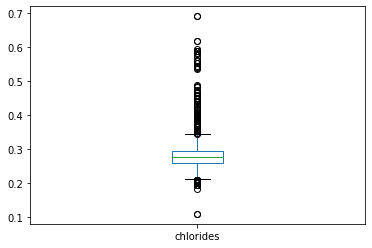

In [189]:
print(df['chlorides'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


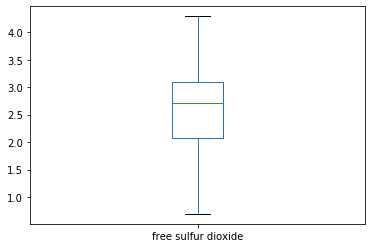

In [190]:
print(df['free sulfur dioxide'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


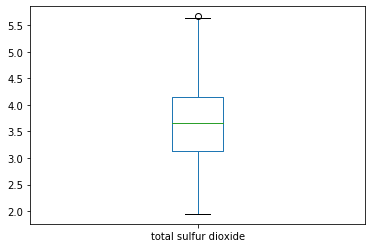

In [191]:
print(df['total sulfur dioxide'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


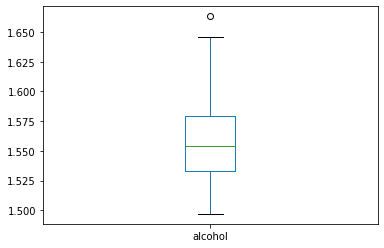

In [192]:
print(df['alcohol'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


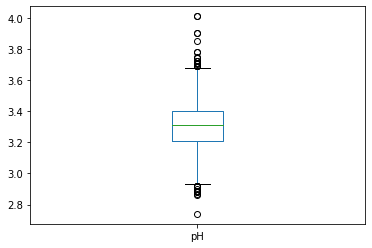

In [193]:
print(df['pH'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


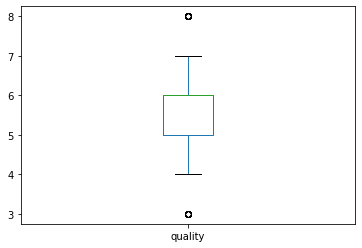

In [194]:
print(df['quality'].plot.box())

In [195]:
#lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1599, 12)
(1481, 12)


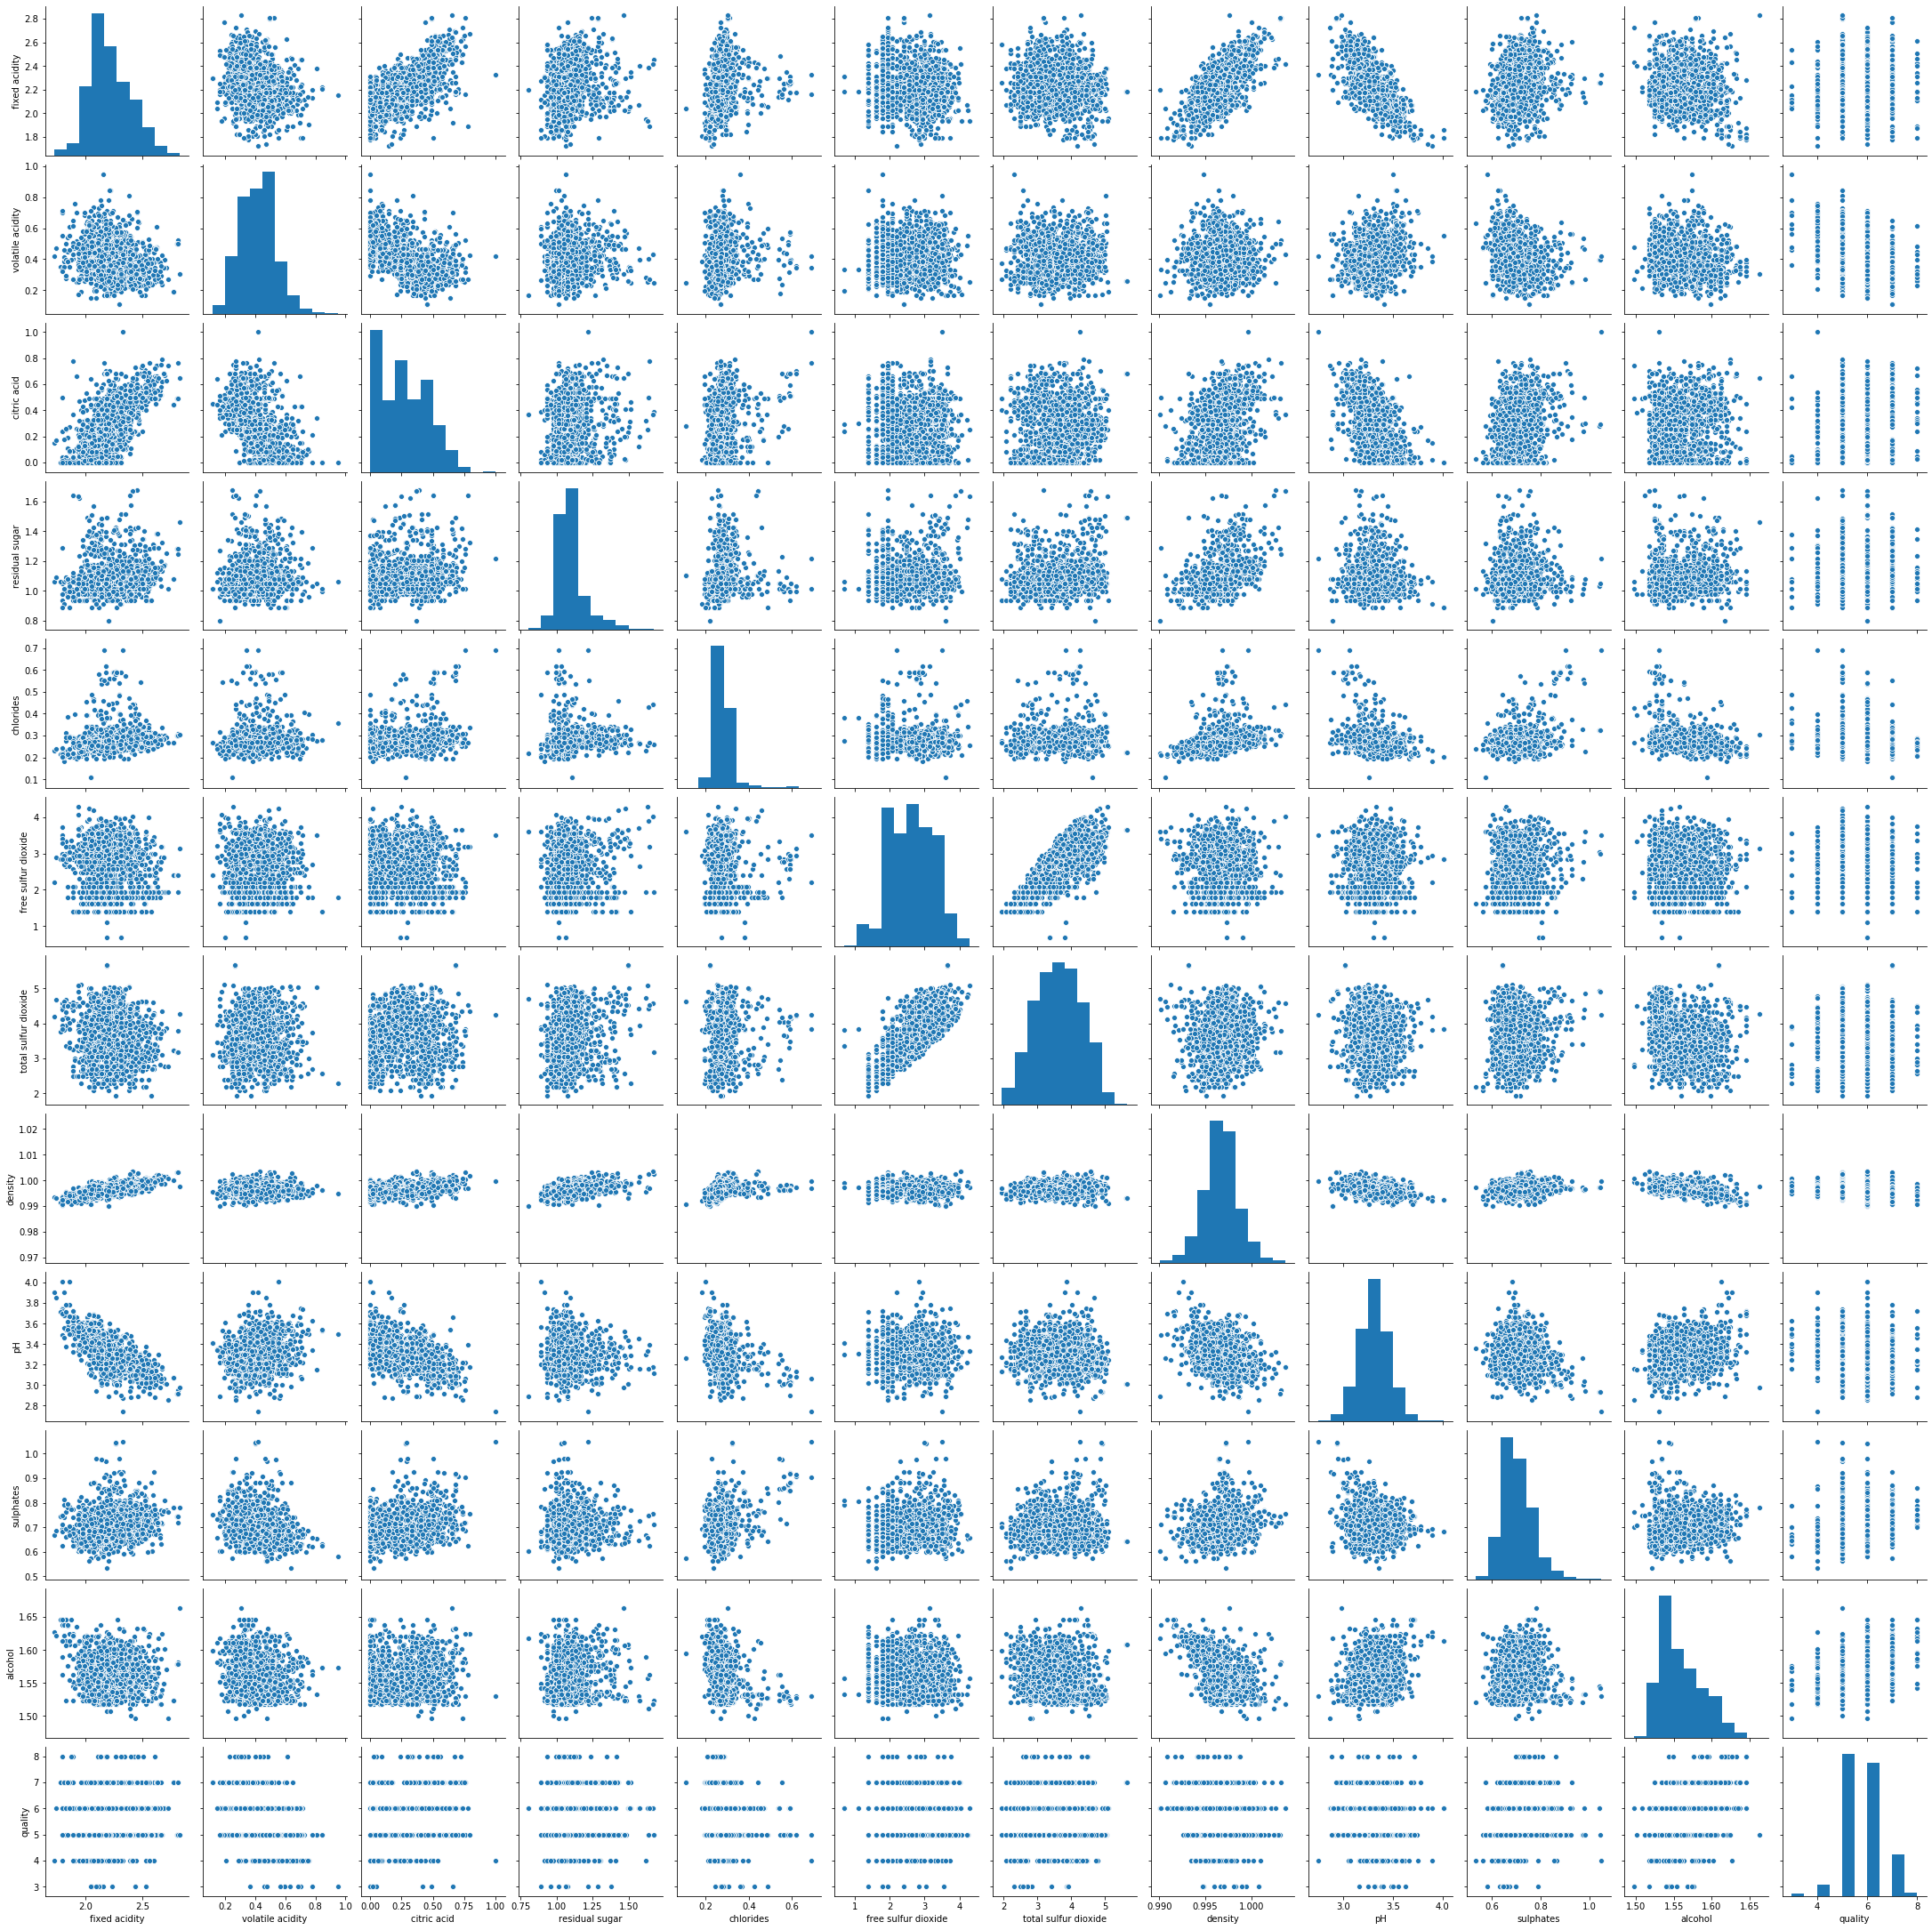

In [196]:
#lets check pairplot using seaborn library

import seaborn as sns
sns.pairplot(df)
plt.show()

In [197]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [222]:
# Now seperating the input column & out columns for further calculation

df1= df_final["alcohol"].values
df2= df_final.drop(["alcohol"], axis=1).values

df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

#Assigning the x & y cordinate value for train, test, spli function
x=df1
y=df2

print(x)
print(x.shape)
print()
print(y)
print(y.shape)

             0
0     1.530296
1     1.542578
2     1.542578
3     1.542578
4     1.530296
...        ...
1476  1.562801
1477  1.581593
1478  1.576359
1479  1.554321
1480  1.576359

[1481 rows x 1 columns]
(1481, 1)

             0         1     2         3         4         5         6  \
0     2.128232  0.530628  0.00  1.031848  0.270648  2.484907  3.555348   
1     2.174752  0.631272  0.00  1.131783  0.305762  3.258097  4.219508   
2     2.174752  0.565314  0.04  1.092668  0.296666  2.772589  4.007333   
3     2.501436  0.246860  0.56  1.031848  0.268925  2.890372  4.110874   
4     2.128232  0.530628  0.00  1.031848  0.270648  2.484907  3.555348   
...        ...       ...   ...       ...       ...       ...       ...   
1476  1.974081  0.470004  0.08  1.048147  0.293560  3.496508  3.806662   
1477  1.931521  0.438255  0.10  1.078495  0.245263  3.688879  3.951244   
1478  1.987874  0.412110  0.13  1.092668  0.270648  3.401197  3.713572   
1479  1.931521  0.497740  0.12  1.048147  0.

In [257]:
#scaling down using standard scalar

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.03557089],
       [-0.59327176],
       [-0.59327176],
       ...,
       [ 0.62326853],
       [-0.1703663 ],
       [ 0.62326853]])

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (42, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test, y_pred)
    print("r2_score corresponding to random state: ", r_state, " is: ", r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state=r_state
    
print()
print()
print("max r2 score corresponding to ", final_r_state," is ", max_r_score)
    
#The below output that we are getting acceptable level of r2 score in most of the cases and max value is also shown

r2_score corresponding to random state:  42  is:  0.07063793648284025
r2_score corresponding to random state:  43  is:  0.06723751605756548
r2_score corresponding to random state:  44  is:  0.07042704408948433
r2_score corresponding to random state:  45  is:  0.061109351434173516
r2_score corresponding to random state:  46  is:  0.05461012023817744
r2_score corresponding to random state:  47  is:  0.0710684791998017
r2_score corresponding to random state:  48  is:  0.0632620229001707
r2_score corresponding to random state:  49  is:  0.060493221583857816
r2_score corresponding to random state:  50  is:  0.055668680554037134
r2_score corresponding to random state:  51  is:  0.05037278950807229
r2_score corresponding to random state:  52  is:  0.05868369630558823
r2_score corresponding to random state:  53  is:  0.06320262536544784
r2_score corresponding to random state:  54  is:  0.05941527864646445
r2_score corresponding to random state:  55  is:  0.07797217135713658
r2_score correspond

In [265]:
#since  maximum r2 score is coming around random state 99 we will use that to create our final model

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 99, test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

print(lr)
print(y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[2.21642777 0.39860721 0.28698675 ... 3.32372215 0.7087245  5.87982451]
 [2.21620595 0.39635599 0.29010897 ... 3.32536477 0.70984402 5.91572887]
 [2.21642777 0.39860721 0.28698675 ... 3.32372215 0.7087245  5.87982451]
 ...
 [2.22004923 0.4353612  0.23601269 ... 3.29690441 0.69044699 5.29364189]
 [2.21780708 0.41260582 0.2675721  ... 3.313508   0.70176309 5.65656332]
 [2.21555348 0.38973404 0.29929293 ... 3.33019651 0.71313707 6.0213411 ]]


In [261]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5, scoring='r2').mean()

#the below cross validation score is less and it shows that we further need to improve our model using more data

-0.07982917754133785

In [262]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ", r2_score(y_test, y_pred))
print("RMSE is : " , np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is:  0.08903188475604988
RMSE is :  0.3453235640562638


In [266]:
#Lets save the model using joblib
from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(lr, 'lr_winequality-red_Project5.pkl')

['lr_winequality-red_Project5.pkl']